# Exercise 3. Comprehensive Introduction to Probability

## Part 1. Basic Probability Concepts
---
### Task 1. Generate a Synthetic Dataset Representing Rain/No Rain Days Over a Year

1. Create a dataset with 365 entries, each representing a day of the year.
2. Assign a binary value for each day: 1 for a rainy day, and 0 for a non-rainy day.
3. Assume that the probability of a rainy day is 30%.

In [3]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 365 days of rain/no rain data with a 30% probability of rain
days = 365
rain_data = np.random.choice([0, 1], size=days, p=[0.7, 0.3])

# Create a DataFrame with a proper datetime index
df = pd.DataFrame({
    'Day': pd.date_range(start='2023-01-01', periods=days, freq='D'),
    'Rain': rain_data
})

# Display the first few rows
df.head()


,Day,Rain
0,2023-01-01,0
1,2023-01-02,1
2,2023-01-03,1
3,2023-01-04,0
4,2023-01-05,0


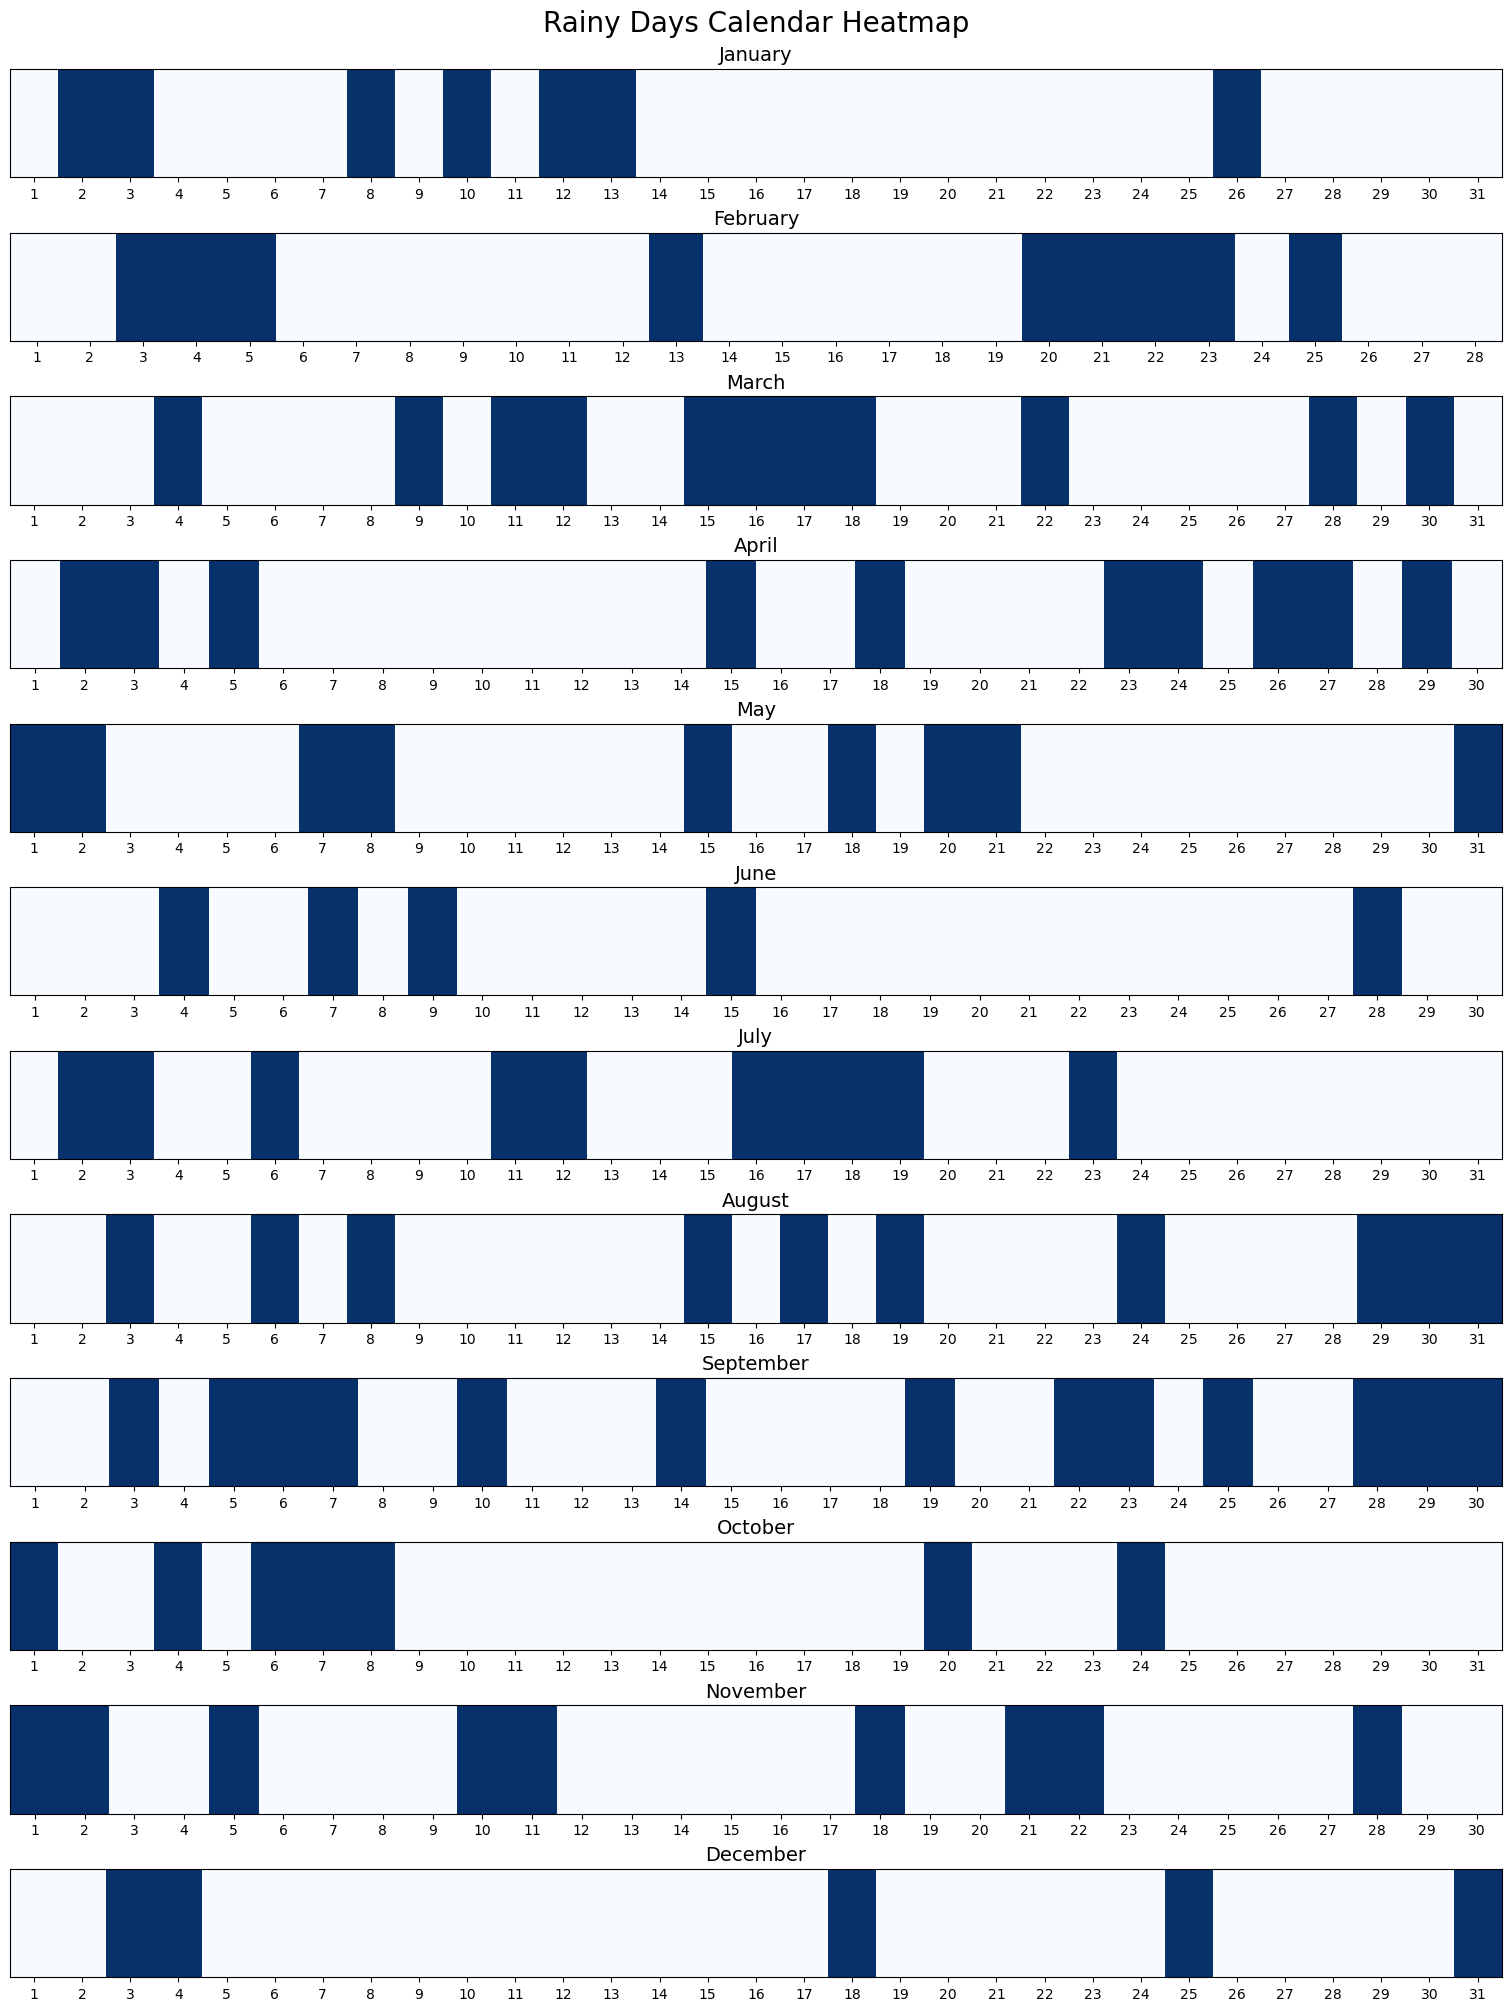

In [4]:
import matplotlib.pyplot as plt
import calendar

# Create a function to plot the calendar grid
def plot_calendar_heatmap(df):
    fig, ax = plt.subplots(12, 1, figsize=(15, 20), constrained_layout=True)

    # Iterate over each month
    for month in range(1, 13):
        # Filter data for the current month
        month_data = df[df['Day'].dt.month == month]

        # Create a grid for the calendar
        month_days = month_data['Day'].dt.day
        rain = month_data['Rain'].values

        # Create a new subplot for the month
        ax[month - 1].set_title(calendar.month_name[month], fontsize=14)
        ax[month - 1].imshow(rain.reshape(1, -1), aspect='auto', cmap='Blues', vmin=0, vmax=1)

        # Set ticks and labels
        ax[month - 1].set_xticks(np.arange(len(month_days)))
        ax[month - 1].set_xticklabels(month_days, fontsize=10)
        ax[month - 1].set_yticks([])  # Hide y-axis

    plt.suptitle("Rainy Days Calendar Heatmap", fontsize=20)
    plt.show()

# Plot the calendar heatmap
plot_calendar_heatmap(df)


#### Questions
1. How many rainy days are there in the dataset? Is it close to the expected 30% of the 365 days? Clue ```df.Rain.sum()```
2. Does the distribution of rainy and non-rainy days look random or do you notice any patterns?

---
### Task 2: Calculate the Frequency, Proportion, and Mean of Rain Days
1. Calculate the total number of rainy days and the proportion of rainy days in the dataset.
2. Calculate the mean, which in this binary case, represents the proportion of rainy days.

Scripts for calculating basic statistics using Pandas can be found here: [Basic statistics on pandas DataFrame](https://github.com/kasiarachuta/Blog/blob/master/Basic%20statistics%20on%20pandas%20DataFrame.ipynb)

In [5]:
# Calculate total rainy days
total_rainy_days = 

# Calculate the proportion of rainy days
proportion_rainy_days =  # Clue n_rainy/total

# Calculate the mean of the rain column
mean_rain_days = # Clue just take the mean

print(f"Total Rainy Days: {total_rainy_days}")
print(f"Proportion of Rainy Days: {proportion_rainy_days:.2f}")
print(f"Mean of Rain Days: {mean_rain_days:.2f}")


Total Rainy Days: 105
Proportion of Rainy Days: 0.29
Mean of Rain Days: 0.29


#### Questions
1. Does the mean match the proportion of rainy days? Why is this the case for binary data?
2. If you were to repeat the simulation, would the number of rainy days always be exactly 30%? Why or why not?

---
### Task 3: Add a Second Variable (Wind Speed) to the Dataset
1. We will add a second variable representing wind speed for each day.
2. Assume the wind speed can be categorized as high (1) or low (0), with a 40% chance of high wind speed on any given day.

In [6]:
# Generate high/low wind speed data with a 40% probability of high wind speed
wind_data = np.random.choice([0, 1], size=days, p=[0.6, 0.4])

# Add wind data to the DataFrame
df['Wind'] = wind_data

# Display the first few rows
df.head()


,Day,Rain,Wind
0,2023-01-01,0,0
1,2023-01-02,1,1
2,2023-01-03,1,1
3,2023-01-04,0,0
4,2023-01-05,0,0


#### Questions
1. What is the overall proportion of days with high wind speed in the dataset? Does it match the expected 40% probability?

---
### Task 4: Calculate the Joint and Marginal Probabilities
1. Calculate the joint probability of rain and high wind speed (i.e., both events occurring on the same day).
2. Calculate the marginal probability of each event separately: the probability of rain and the probability of high wind speed.

In [ ]:
# Calculate joint probability of rain and high wind speed
joint_probability = len(df[(df['Rain'] == 1) & (df['Wind'] == 1)]) / days

# Calculate probabilities 
probability_rain = # Remember task 2?
probability_wind = 

print(f"Joint Probability of Rain and High Wind: {joint_probability:.2f}")
print(f" Probability of Rain: {probability_rain:.2f}")
print(f" Probability of High Wind: {probability_wind:.2f}")


#### QUestions
1. What is the joint probability of a rainy day with high wind speed? How does it compare to the individual probabilities of rain and wind speed?
2. Why is the joint probability generally lower than the individual marginal probabilities? What does this tell you about the relationship between rain and high wind?

--- 
### Task 5: Visualize the Joint and Marginal Probabilities
1. Create a stacked bar chart that shows the distribution of rainy and non-rainy days, split further by wind speed categories.

/tmp/ipykernel_674/2811506166.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='coolwarm')


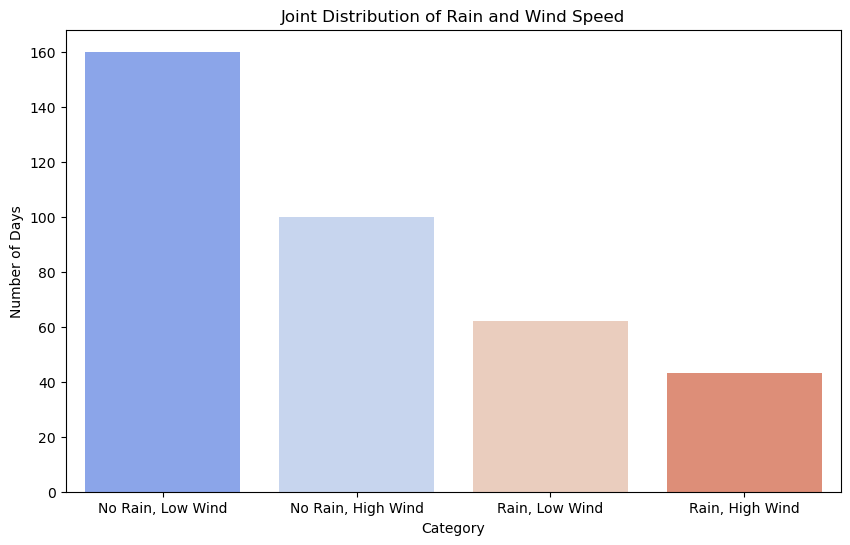

In [8]:
import seaborn as sns

# Create a new column for combined categories
df['Rain_Wind'] = df['Rain'].astype(str) + '_' + df['Wind'].astype(str)

# Count occurrences of each category
counts = df['Rain_Wind'].value_counts().sort_index()

# Prepare data for the bar plot
categories = ['0_0', '0_1', '1_0', '1_1']
labels = ['No Rain, Low Wind', 'No Rain, High Wind', 'Rain, Low Wind', 'Rain, High Wind']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette='coolwarm')
plt.title('Joint Distribution of Rain and Wind Speed')
plt.xlabel('Category')
plt.ylabel('Number of Days')
plt.show()


#### Questions
1. Based on the bar chart, which combination of events (rain and wind) is most common? Which is the least common?
2. How does visualizing the joint distribution help in understanding the relationship between these variables? 

---

### Final Questions
1. What is the difference between frequency and probability? How can we use probabilities to describe the likelihood of rain based on historical data?
2. Why is it important to understand and calculate the proportion of rainy days in a dataset? How does this help us interpret climatological data?
3. When calculating the joint probability of rain and high wind speed, what information does this provide compared to looking at the probability of each event separately?
4. Explain the concept of conditional probability using the dataset from Notebook 1. How does the probability of rain change when conditioned on high wind speeds?
5. Why is conditional probability useful in meteorology? How can it help improve the accuracy of weather forecasts?
6. Based on the results from the dataset, how confident can we be about predicting rain based on temperature and wind conditions? What might be the limitations of such predictions?